# Dalitz

Let's try to fit some Dalitz data. To start with it's probably simpler to generate a model with `zfit` itself and fit it back.

## Decay

We will fit 

$$
D^0 \to K^0_S \pi^+\pi^-
$$

decays generated with the following intermediate resonances:
- $D^0 \to K^0_S \rho(770)$
- $D^0 \to K^{*-}\pi^+$

### Phasespace
At first, we should be able to generate the correct phase-space. 
In this decay, it is defined by the two invariant mass paramenters 

$$
m^2_{12}= m^2(K^0_S\pi^+)\qquad m^2_{13}= m^2(K^0_S\pi^-)
$$

In [1]:
#Import modules
import zfit
import mplhep
import numpy as np

/Users/maurizio/Software/zfit/lib/python3.11/site-packages/zfit/__init__.py:59: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(


In [2]:
import os, sys
sys.path.append(f'{os.environ["PWD"]}/utilities')
from dalitz import DalitzKinematics

In [3]:
# Define Observables
mKS = 0.495
mPi = 0.13957
mDz = 1.864
decay = DalitzKinematics(mDz, [mPi,mKS,mPi])
mp = zfit.Space("mp", limits=(decay.mSqMin([0,1]), decay.mSqMax([0,1])))
mn = zfit.Space("mn", limits=(decay.mSqMin([1,2]), decay.mSqMax([1,2])))
mz = zfit.Space("mz", limits=(decay.mSqMin([0,2]), decay.mSqMax([0,2])))

Plot the phase space

In [4]:
import matplotlib.pyplot as plt

/Users/maurizio/Documents/GitRepositories/zfit_exercises/utilities/dalitz.py:169: RuntimeWarning: invalid value encountered in sqrt
  Ymin= np.power(Est2+Est3,2) - np.power(np.sqrt(Est2*Est2-m2Sq)+ np.sqrt(Est3*Est3-m3Sq),2)
/Users/maurizio/Documents/GitRepositories/zfit_exercises/utilities/dalitz.py:170: RuntimeWarning: invalid value encountered in sqrt
  Ymax= np.power(Est2+Est3,2) - np.power(np.sqrt(Est2*Est2-m2Sq)- np.sqrt(Est3*Est3-m3Sq),2)


Text(0, 0.5, '$m^2_{K^0_S\\pi^-}$ ($GeV^2/c^4$)')

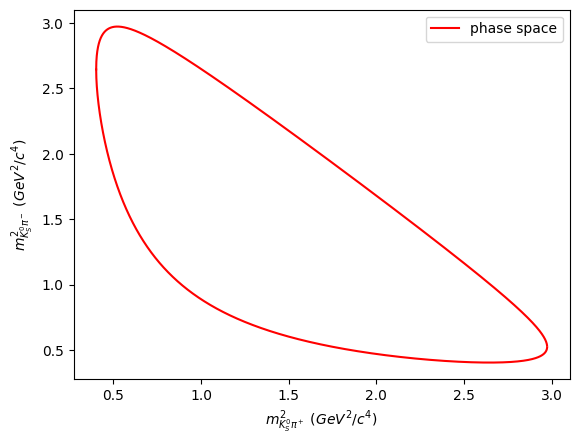

In [5]:
X, Yl, Yh = decay.Contour([0,1],10000)
plt.plot(X,Yl,color='r',label='phase space')
plt.plot(X,Yh,color='r')
plt.legend()
plt.xlabel(r'$m^2_{K^0_S\pi^+}$ ($GeV^2/c^4$)')
plt.ylabel(r'$m^2_{K^0_S\pi^-}$ ($GeV^2/c^4$)')

Generate events to fill the phase space

In [6]:
import phasespace
from phasespace import GenParticle

In [7]:
genPip = GenParticle('pi+', mPi)
genPim = GenParticle('pi-', mPi)
genKS  = GenParticle('KS' , mKS)
genDz  = GenParticle('D0' , mDz)
genDz.set_children(genPip,genKS,genPim)
#weights, particles = phasespace.nbody_decay(mDz,[mPi,mKS,mPi]).generate(n_events=1000)
weights, particles = genDz.generate(n_events=1000)

I0000 00:00:1716560458.172645 1820370 service.cc:145] XLA service 0x600000680000 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1716560458.172688 1820370 service.cc:153]   StreamExecutor device (0): Host, Default Version
I0000 00:00:1716560458.189584 1820372 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [8]:
particles

{'pi+': <tf.Tensor: shape=(1000, 4), dtype=float64, numpy=
 array([[-0.3456432 ,  0.10407093,  0.09400052,  0.39826607],
        [-0.3539535 , -0.10331737, -0.29376085,  0.49166328],
        [-0.20199602, -0.40508423,  0.25918498,  0.5399558 ],
        ...,
        [ 0.57903543, -0.16899573,  0.01190598,  0.619244  ],
        [ 0.58189553, -0.42326947,  0.18838347,  0.75678766],
        [-0.14243616,  0.27452281,  0.73642175,  0.81083143]])>,
 'KS': <tf.Tensor: shape=(1000, 4), dtype=float64, numpy=
 array([[ 0.77954648, -0.29286208, -0.04222182,  0.96967448],
        [-0.33448817, -0.08711647,  0.05438975,  0.60618055],
        [-0.35616877,  0.09989083,  0.01321546,  0.618089  ],
        ...,
        [-0.06885041,  0.01773724, -0.33953418,  0.60445302],
        [-0.5984247 ,  0.48704162, -0.23433197,  0.94618082],
        [ 0.11259522, -0.2301604 , -0.70792113,  0.90101544]])>,
 'pi-': <tf.Tensor: shape=(1000, 4), dtype=float64, numpy=
 array([[-0.43390328,  0.18879115, -0.0517787 , 

In [9]:
pPiPi = particles['pi+']+particles['pi-']
pKSPip = particles['pi+']+particles['KS']
pKSPim = particles['pi-']+particles['KS']

In [10]:
import tf_kinematics as tfk

In [11]:
tfk.M(pPiPi).numpy()

array([0.32337986, 1.20817214, 1.18965759, 0.6279283 , 1.12070289,
       0.83430982, 0.70038726, 0.88680271, 1.17646704, 0.95386225,
       0.42271358, 1.09311578, 0.801743  , 0.36612957, 0.42727314,
       1.30299804, 1.13768841, 0.8665839 , 0.50091551, 0.81407571,
       0.98700071, 0.76267975, 0.89721776, 1.2889988 , 0.69225088,
       0.4516051 , 0.58324631, 0.93975659, 1.08227809, 1.23521781,
       1.12083587, 0.74281575, 0.487183  , 1.1184591 , 0.64910556,
       0.88866186, 0.66175642, 0.77025146, 0.71262739, 0.95821831,
       0.42386078, 0.64154463, 1.25443503, 0.95441017, 0.59315269,
       0.74360841, 0.70288821, 1.10665971, 0.88625487, 0.39264458,
       0.50337171, 0.66151596, 0.85827811, 0.4001969 , 0.80151214,
       1.29180953, 0.54593669, 0.83288081, 0.47424447, 0.3967504 ,
       0.50792021, 1.02578352, 0.61275678, 0.4178996 , 0.55144214,
       0.96126386, 0.84849235, 1.09232752, 1.22057491, 1.2816087 ,
       0.4057199 , 0.66043711, 1.08950098, 0.5871901 , 0.94795

In [12]:
mSqP = tfk.M2(pKSPip).numpy()
mSqN = tfk.M2(pKSPim).numpy()
mSqZ = tfk.M2(pPiPi).numpy()
mP = tfk.M(pKSPip).numpy()
mN = tfk.M(pKSPim).numpy()
mZ = tfk.M(pPiPi).numpy()

Text(0, 0.5, '$m^2_{K^0_S\\pi^-}$ ($GeV^2/c^4$)')

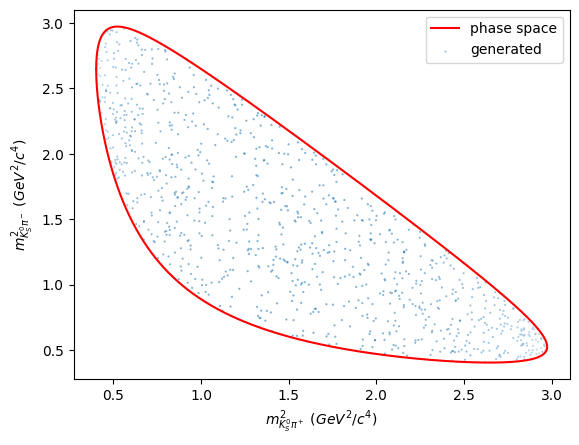

In [13]:
plt.plot(X,Yl,color='r',label='phase space')
plt.plot(X,Yh,color='r')
plt.scatter(mSqP,mSqN,label='generated', s=weights.numpy(), alpha=0.5)
plt.legend()
plt.xlabel(r'$m^2_{K^0_S\pi^+}$ ($GeV^2/c^4$)')
plt.ylabel(r'$m^2_{K^0_S\pi^-}$ ($GeV^2/c^4$)')

## Generate Data with a Model
Let's first import a relativistic Breit Wigner PDF from [zfit-physics](https://github.com/zfit/zfit-physics/tree/develop)

In [14]:
import zfit_physics as zphys

In [15]:
kstmpi= zphys.pdf.RelativisticBreitWigner(m=0.89167, gamma=0.0514, obs=mn )
rhoks = zphys.pdf.RelativisticBreitWigner(m=0.77526, gamma=0.1502, obs=mz )

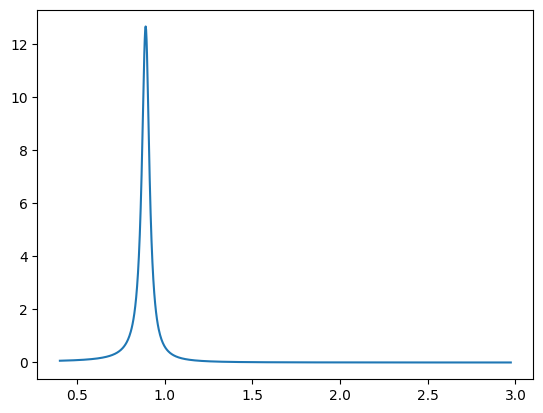

In [16]:
x = np.linspace(mn.limits[0][0][0], mn.limits[1][0][0], 1000)
plt.figure()
y = kstmpi.pdf(x).numpy()
plt.plot(x,y)

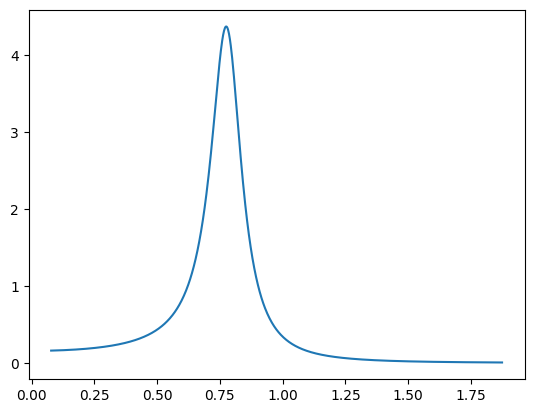

In [17]:
x = np.linspace(mz.limits[0][0][0], mz.limits[1][0][0], 1000)
plt.figure()
y = rhoks.pdf(x).numpy()
plt.plot(x,y)

Create a model:
$$
f(\vec{x}) = f_{NR} + (1-f_{NR})\left(f_{\rho}\text{BW}_{\rho}(\vec{x}) + (1-f_{\rho})\text{BW}_{K^*}(\vec{x})\right)
$$

In [18]:
# fractions
f_NR  = zfit.Parameter("f_NR" , 0.3, 0, 1)
f_rho = zfit.Parameter("f_rho", 0.6, 0, 1)

In [19]:
z_mMother = zfit.Parameter("mMother", mDz)
z_m1 = zfit.Parameter("m1", mPi)
z_m2 = zfit.Parameter("m2", mKS)
z_m3 = zfit.Parameter("m3", mPi)


In [20]:
dp_params_init = {'mMother':  mDz, 'm1': mPi, 'm2': mKS, 'm3': mPi}
dp_params = {name: zfit.Parameter(name, val) for name, val in dp_params_init.items()}

In [21]:
from pdfs import DalitzUniform
# PDFs
nr = DalitzUniform(obs=mn*mp*mz, **dp_params)
kstmpi= zphys.pdf.RelativisticBreitWigner(m=0.89167, gamma=0.0514, obs=mn ) * nr
rhoks = zphys.pdf.RelativisticBreitWigner(m=0.77526, gamma=0.1502, obs=mz ) * nr
# nr    = zfit.pdf.Uniform(low =mn.limits[0][0][0],high=mn.limits[1][0][0], obs=mn) * \
#         zfit.pdf.Uniform(low =mp.limits[0][0][0],high=mp.limits[1][0][0], obs=mp)

# model
model = zfit.pdf.SumPDF([nr, kstmpi, rhoks], fracs=[f_NR, f_rho])

In [22]:
# Generate some data following the model above
n_sample = 10000
#data = model.create_projection_pdf(obs=mn*np).create_sampler(n_sample, limits=mn*mp)
data = model.create_sampler(n_sample, limits=mn*mp*mz)
data.resample()

ValueError: Tensor's shape (9673, 3) is not compatible with supplied shape (10000, 3).

In [ ]:
data_np = data.numpy()
fig, ax = plt.subplots(2,2,figsize=(10, 8))
decay.Plot(data_np[:,0],data_np[:,1],ax=ax[0][0],bins=40)
decay.PlotBoundary(ax[0][0],[0,1],1000)
ax[0][0].set_xlabel(r'$m^2_{K^0_S\pi^-}$ ($GeV^2/c^4$)')
ax[0][0].set_ylabel(r'$m^2_{K^0_S\pi^+}$ ($GeV^2/c^4$)')
# project the data on the x axis
mplhep.histplot(
        np.histogram(data_np[:,0], bins=100),
        yerr=True,
        color="black",
        histtype="errorbar",
        ax = ax[1][0]
    )
ax[1][0].set_ylabel("Counts")
ax[1][0].set_xlabel(r'$m^2_{K^0_S\pi^-}$ ($GeV^2/c^4$)')
# project the data on the y axis
mplhep.histplot(
        np.histogram(data_np[:,1], bins=100),
        yerr=True,
        color="black",
        histtype="errorbar",
        ax = ax[0][1]
    )
ax[0][1].set_ylabel("Counts")
ax[0][1].set_xlabel(r'$m^2_{K^0_S\pi^+}$ ($GeV^2/c^4$)')
# Turn off the axis for the subplot at position [1, 1] to make it completely blank
ax[1, 1].axis('off')

In [ ]:
mz2 = z_mMother*z_mMother - mp - mn

In [ ]:
model

In [ ]:
model.obs

In [ ]:
help(model.create_projection_pdf)